In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [2]:
data_train = pd.read_csv('fashion-mnist_train.csv', header = 0)
data_test = pd.read_csv('fashion-mnist_test.csv', header = 0)

In [3]:
len(data_train)

60000

In [4]:
data_train['label'].values

array([2, 9, 6, ..., 8, 8, 7])

In [5]:
labels = data_train['label'].values.reshape(1, 60000)
labels_ = np.zeros((60000, 10))
labels_[np.arange(60000), labels] = 1
labels_ = labels_.transpose()
train = data_train.drop('label', axis=1).transpose()

In [6]:
labels_test = data_test['label'].values.reshape(1, 10000)
labels_test_ = np.zeros((10000, 10))
labels_test_[np.arange(10000), labels_test] = 1
labels_test_ = labels_test_.transpose()
test = data_test.drop('label', axis=1).transpose()

In [7]:
train = np.array(train / 255.0)
test = np.array(test / 255.0)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

In [10]:
def get_label_name(idx):
    if (idx == 0):
        return '(0) T-shirt/top'
    elif (idx == 1):
        return '(1) Trouser'
    elif (idx == 2):
        return '(2) Pullover'
    elif (idx == 3):
        return '(3) Dress'
    elif (idx == 4):
        return '(4) Coat'
    elif (idx == 5):
        return '(5) Sandal'
    elif (idx == 6):
        return '(6) Shirt'
    elif (idx == 7):
        return '(7) Sneaker'
    elif (idx == 8):
        return '(8) Bag'
    elif (idx == 9):
        return '(9) Ankle boot'

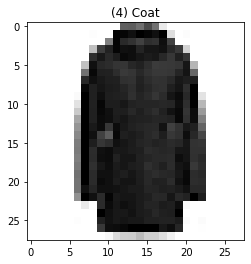

In [12]:
idx = 6
plt.imshow(train[:,idx].reshape(28,28), cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.title(get_label_name(labels[:,idx]))
plt.show()



In [26]:
# Размерность входного слоя - количество пикселей в каждом изображении
n_dim = 784 
tf.reset_default_graph()

# Задаем количество нейронов в слоях
n1 = 15 # Скрытый слой
n2 = 10 # Выходной слой

cost_history = np.empty(shape=[1], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [10, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
                 
# Реализация матричного уравнения работы сети
Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) 
Z2 = tf.matmul(W2, Z1) + b2 
y_ = tf.nn.softmax(Z2,0) 
# Функция потерь - кросс-энтропия
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
# Оптимизатор - градиентный спуск
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 3000
    
cost_history = []
accuracy_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer, feed_dict = {X: train, Y: labels_, learning_rate: 0.2})
    cost_ = sess.run(cost, feed_dict={ X:train, Y: labels_})
    cost_history = np.append(cost_history, cost_)
    
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = sess.run(tf.reduce_mean(tf.cast(correct_predictions, "float")), feed_dict={ X:test, Y: labels_test_})
    accuracy_history = np.append(accuracy_history, accuracy)
    if (epoch % 100 == 0):
        print("Эпоха",epoch,", функция потерь: ", cost_,", точность: ", accuracy)

Эпоха 0 , функция потерь:  0.32567015 , точность:  0.058983333
Эпоха 100 , функция потерь:  0.2642089 , точность:  0.43005
Эпоха 200 , функция потерь:  0.18877597 , точность:  0.62255
Эпоха 300 , функция потерь:  0.15338214 , точность:  0.66871667
Эпоха 400 , функция потерь:  0.13759 , точность:  0.7008
Эпоха 500 , функция потерь:  0.1281667 , точность:  0.7266667
Эпоха 600 , функция потерь:  0.12112656 , точность:  0.7495833
Эпоха 700 , функция потерь:  0.115339465 , точность:  0.76525
Эпоха 800 , функция потерь:  0.1104865 , точность:  0.7773
Эпоха 900 , функция потерь:  0.10643924 , точность:  0.78651667
Эпоха 1000 , функция потерь:  0.10308134 , точность:  0.79331666
Эпоха 1100 , функция потерь:  0.10028147 , точность:  0.79966664
Эпоха 1200 , функция потерь:  0.09791898 , точность:  0.80525
Эпоха 1300 , функция потерь:  0.095899686 , точность:  0.80895
Эпоха 1400 , функция потерь:  0.094145946 , точность:  0.81261665
Эпоха 1500 , функция потерь:  0.09260002 , точность:  0.8157
Эпо

In [16]:
correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
print ("Accuracy:", accuracy.eval({X: train, Y: labels_}, session = sess))

Accuracy: 0.83825


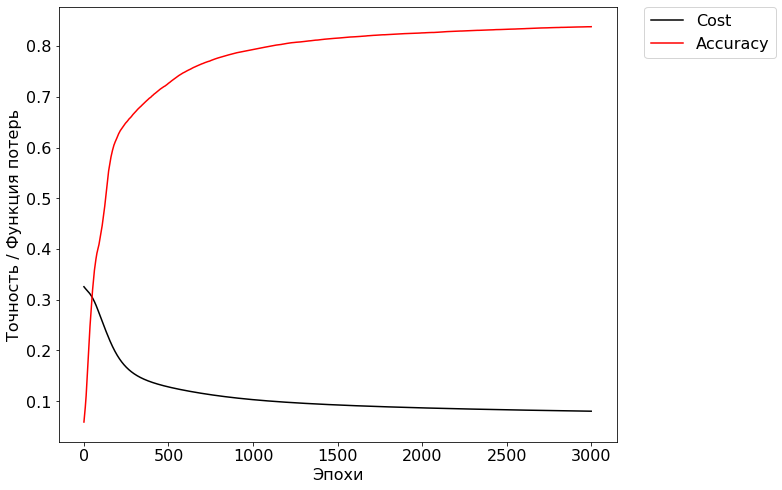

In [21]:
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, ls='solid', color = 'black', label = 'Cost')
ax.plot(accuracy_history, ls='solid', color = 'red', label = 'Accuracy')
ax.set_xlabel('Эпохи', fontsize = 16)
ax.set_ylabel('Точность / Функция потерь', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)